In [427]:
import cv2
from sklearn import svm
import matplotlib.pyplot as plt
fake_image = 'D:\\Image Processing\\F2.JPG'
real_image = 'D:\\Image Processing\\R3.PNG'

In [428]:
fake_image = cv2.imread(fake_image)

In [429]:
real_image = cv2.imread(real_image)

In [430]:
fake_image.shape

(410, 410, 3)

In [431]:
real_image.shape

(320, 320, 3)

In [432]:
real_image=cv2.resize(real_image  , (265 , 256))

In [433]:
fake_image=cv2.resize(fake_image,(256,256))

In [434]:
plt.subplot(2,2,1)

In [435]:
fake_image=cv2.cvtColor(fake_image, cv2.COLOR_BGR2RGB)

In [436]:
plt.imshow(fake_image)
plt.title("Fake Image")

In [437]:
real_image=cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB)

In [438]:
plt.subplot(2,2,2)

In [439]:
plt.imshow(real_image)
plt.title("Real Image")

In [440]:
hsv_fake_image=cv2.cvtColor(fake_image,cv2.COLOR_BGR2HSV)

In [441]:
plt.subplot(2,2,3)

In [442]:
plt.imshow(hsv_fake_image)


In [443]:
hsv_real_image=cv2.cvtColor(real_image,cv2.COLOR_BGR2HSV)

In [444]:
plt.subplot(2,2,4)

In [445]:
plt.imshow(hsv_real_image)

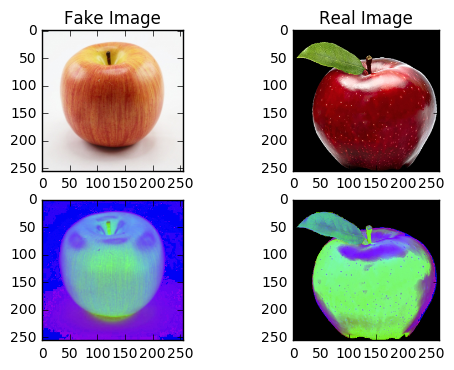

In [446]:
plt.show()

In [447]:
##Finding Hue Plane and Saturation Plane of the HSV model

In [448]:
fake_hPlane,fake_sPlane,fake_vPlane=cv2.split(hsv_fake_image)

In [449]:
plt.subplot(1,3,1)

In [450]:
plt.imshow(fake_hPlane,cmap="gray")

In [451]:
plt.title("Fake Image H Plane")

In [452]:
plt.subplot(1,3,2)

In [453]:
plt.imshow(fake_sPlane,cmap="gray")

In [454]:
plt.title("Fake Image S Plane")

In [455]:
plt.subplot(1,3,3)

In [456]:
plt.imshow(fake_vPlane,cmap="gray")

In [457]:
plt.title("Fake Value Plane")

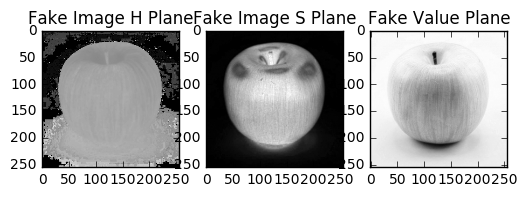

In [458]:
plt.show()

In [459]:
real_hPlane,real_sPlane,real_vPlane=cv2.split(hsv_real_image)

In [460]:
plt.subplot(1,3,1)

In [461]:
plt.imshow(real_hPlane,cmap="gray")

In [462]:
plt.title("Real Image H Plane")

In [463]:
plt.subplot(1,3,2)

In [464]:
plt.imshow(real_sPlane,cmap="gray")

In [465]:
plt.title("Real Image S Plane")

In [466]:
plt.subplot(1,3,3)

In [467]:
plt.imshow(real_vPlane,cmap="gray")

In [468]:
plt.title("Real Image V Plane")

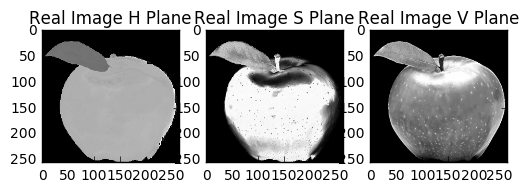

In [469]:
plt.show()

In [470]:
 hist_fake = cv2.calcHist( [hsv_fake_image], [0, 1], None, [180, 256], [0, 180, 0, 256] )

In [471]:
plt.subplot(1,2,1)

In [472]:
plt.plot(hist_fake,color="k")
plt.ylim(0,600)

(0, 600)

In [473]:

plt.subplot(1,2,2)

In [474]:
 hist_real = cv2.calcHist( [hsv_real_image], [0, 1] ,None,[180, 256], [0, 180, 0, 256])

In [475]:
plt.plot(hist_real,color="k")
plt.ylim(0,600)

(0, 600)

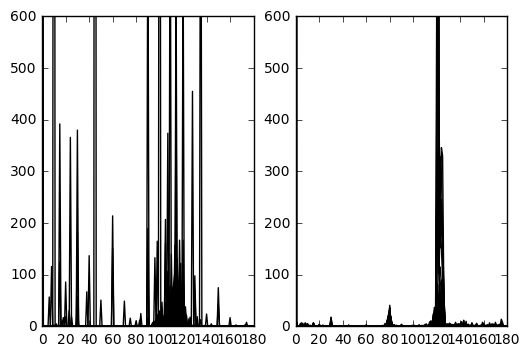

In [476]:
plt.show()

In [477]:
def draw_image_histogram(image, channels, color='k'):
    hist = cv2.calcHist([image], channels, None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0,1000])
    


In [478]:
draw_image_histogram(real_sPlane,[0])


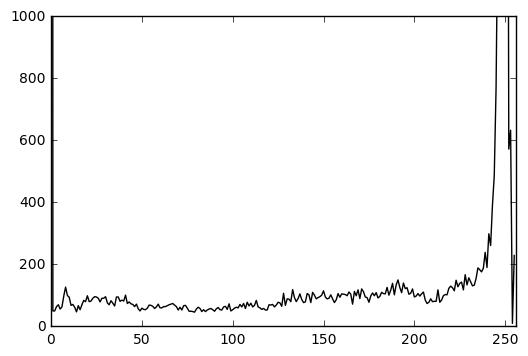

In [479]:
plt.show()

In [480]:
draw_image_histogram(fake_sPlane,[0])

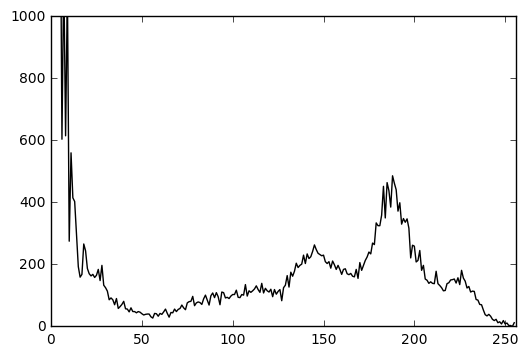

In [481]:
plt.show()

In [482]:
draw_image_histogram(fake_vPlane,[0])

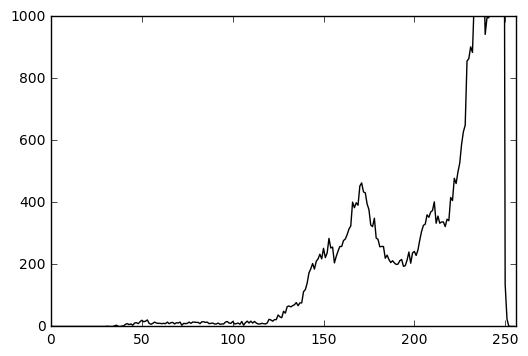

In [483]:
plt.show()

In [484]:
draw_image_histogram(real_vPlane,[0])

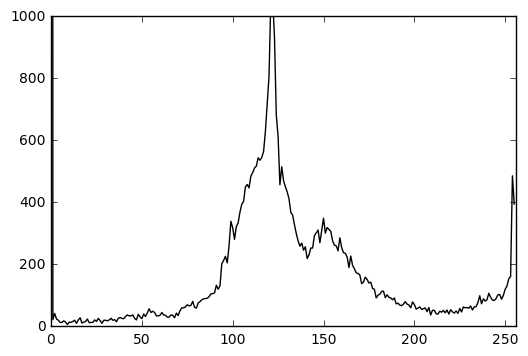

In [485]:
plt.show()

In [486]:
draw_image_histogram(real_hPlane,[0])

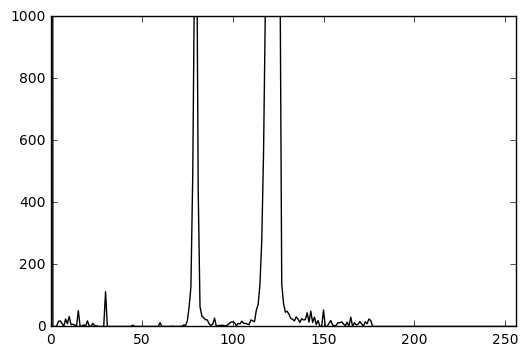

In [487]:
plt.show()


In [488]:
draw_image_histogram(fake_hPlane,[0])

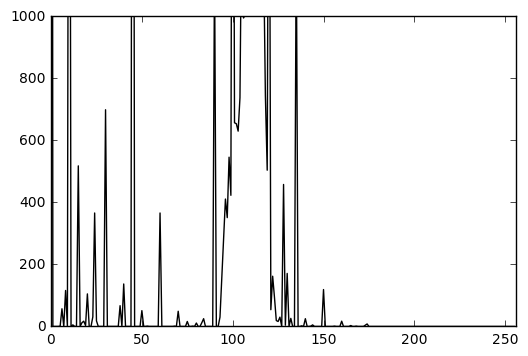

In [489]:
plt.show()

In [490]:
def fd_histogram_hplane(image):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0], None, [256], [0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    hist.flatten()
    return hist


In [491]:
fd_histogram_hplane(fake_image).shape


(256, 1)

In [492]:
def fd_histogram_splane(image):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [1], None, [256], [0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    hist.flatten()
    return hist

In [493]:
def fd_histogram_vplane(image):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [2], None, [256], [0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    hist.flatten()
    return hist


In [494]:
import numpy as np

In [495]:
def get_global_feat(image):
    global_feature = np.hstack([fd_histogram_hplane(image), fd_histogram_splane(image), fd_histogram_vplane(image)])
    return global_feature


In [496]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [497]:
rescaled_features = scaler.fit_transform(get_global_feat(fake_image))


In [498]:
X_train=rescaled_features.reshape(1,-1)


In [499]:
X_train.shape


(1, 768)

In [500]:
Y_train=np.array([0,0])


In [501]:
Y_train


array([0, 0])

In [502]:
list=[
'F2.jpg',
'F3.jpg',
'R1.png',
'R2.jpg',
'R3.png',
'R4.jpg',
'R6.jpg']



In [503]:
path='D:\\Image Processing\\'

In [504]:
training_set=[]
training_labels=[]
for file in list:
    img = cv2.imread(path + file)
    res=cv2.resize(img,(256,256))
    hsv_image = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
    xarr=np.squeeze(np.array(hsv_image).astype(np.float32))
    arr= np.array(xarr)
    flat_arr= arr.ravel()
    training_set.append(flat_arr)
    if('F' in file):
        training_labels.append(0)
    else:
        training_labels.append(1)
        

In [505]:
training_labels


[0, 0, 1, 1, 1, 1, 1]

In [506]:
training_set

[array([ 90.,   6., 244., ...,   0.,   0., 237.], dtype=float32),
 array([  0.,   0., 255., ...,   0.,   0., 255.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([  0.,   0., 255., ...,   0.,   0., 255.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([  0.,   0., 255., ...,   0.,   0., 255.], dtype=float32),
 array([  0.,   0., 246., ...,   0.,   0., 238.], dtype=float32)]

In [507]:
trainData=np.float32(training_set)
responses=np.float32(training_labels)

In [508]:
clf = svm.SVC(kernel='linear')

In [509]:
clf.fit(trainData,responses)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [510]:
test_set=[]
img = cv2.imread(path + 'R5.JPG')
res=cv2.resize(img,(256,256))
hsv_image = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
xarr=np.squeeze(np.array(hsv_image).astype(np.float32))
arr= np.array(xarr)
flat_arr= arr.ravel()
test_set.append(flat_arr)


In [511]:
test_set


[array([  0.,   0., 255., ...,   0.,   0., 254.], dtype=float32)]

In [512]:
testData=np.float32(test_set)

In [513]:
y_pred = clf.predict(test_set)

In [514]:
y_pred

array([1.], dtype=float32)

In [515]:

from sklearn import metrics


In [516]:
test_labels=[1]

In [517]:
responses=np.float32(test_labels)

In [518]:
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 1.0
